In [150]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [151]:
# Set Pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10)
from IPython.core.display import display, HTML

In [152]:
def force_show_all(df):
  "Print dataframe nicely"
  with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    display(HTML(df.to_html()))

In [153]:
data= pd.read_csv("/content/Assignment1_Q2_Data.csv")
data

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.918,1.000,3.472,0.998,1.000,7,4,42,3,1,0,25.900
1,2,5.021,1.000,3.531,1.500,2.000,7,4,62,1,1,0,29.500
2,3,4.543,1.000,2.275,1.175,1.000,6,3,40,2,1,0,27.900
3,4,4.557,1.000,4.050,1.232,1.000,6,3,54,4,1,0,25.900
4,5,5.060,1.000,4.455,1.121,1.000,6,3,42,3,1,0,29.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,24,6.093,1.500,6.726,1.652,1.000,6,3,44,4,1,0,37.900
24,25,8.361,1.500,9.150,1.777,2.000,8,4,48,1,1,1,38.900
25,26,8.140,1.000,8.000,1.504,2.000,7,3,3,1,3,0,36.900
26,27,9.142,1.500,7.326,1.831,1.500,8,4,31,4,1,0,45.800


There are 28 rows and 13 columns and the ID is not our feature. so we need to get rid of it. So it leaves us with 11 features.

In [154]:
print(np.shape(data))  # num_data x num_features 
data.columns

(28, 13)


Index(['House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places',
       'Price (1000$)'],
      dtype='object')

In [155]:
def loss_function(x_train, y_train, curr_theta):
	'''
	x_train: [2xnum_data]
	y_train: [1xnum_data]
	'''
	num_data = np.shape(y_train)[1]
	assert np.shape(x_train)[1] == np.shape(y_train)[1]

	error = y_train - np.matmul(curr_theta, x_train)  # 1 x num_data 
	cost = np.sum(error**2) / (2 * num_data)
	return cost

In [156]:
def gradient_descent(x_train, y_train, curr_theta, learning_rate=0.1, num_steps=1000, thresh: float=1e-5, do_print=True):
	'''
	x_train: [num_features, num_data]
	y_train: [1, num_data]
	curr_theta: [1, num_features]
	'''
	assert np.shape(x_train)[1] == np.shape(y_train)[1]

	num_data = np.shape(y_train)[1]
	loss_per_step = []
	
	for step in range(num_steps):

		curr_predict = np.matmul(curr_theta, x_train)  # 1 x num_data
		error = (y_train - curr_predict).T  # num_data x 1
		assert np.shape(curr_predict) == np.shape(y_train)

		if np.linalg.norm(error) < thresh:
			break

		d_cost_d_theta = (1/num_data) * (np.matmul(x_train, error)).T # 1 x num_features
		new_theta = curr_theta + (learning_rate) * d_cost_d_theta

		new_loss = loss_function(x_train, y_train, new_theta)
		if do_print:
			print(f'step = {step}, curr_theta = {curr_theta}, new_theta={new_theta}, new_loss = {new_loss}')
		loss_per_step.append(new_loss)

		if step >= 2:
			if (np.abs(loss_per_step[-1] - loss_per_step[-2]) < thresh):
				break
	
		# update theta 
		curr_theta = new_theta

	return new_theta, loss_per_step

# We have to normalize our data. Otherwise, we will not be able to find their influence on our data set

In [157]:
data.mean()

House ID            14.500
Local Price          7.222
Bathrooms            1.268
Land Area            6.461
Living area          1.512
                     ...  
Age of home         36.321
Construction type    2.250
Architecture type    1.214
# Fire places        0.321
Price (1000$)       38.157
Length: 13, dtype: float64

In [158]:
df = data.copy()
df = df.drop('House ID', axis=1)
normalized_df = (df - df.mean()) / df.std()
normalized_df = (df - df.min()) / df.max()


In [159]:
force_show_all(normalized_df)

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,0.063,0.000,0.094,0.007,0.500,0.200,0.400,0.629,0.500,0.000,0.000,0.000
1,0.069,0.000,0.098,0.154,1.000,0.200,0.400,0.952,0.000,0.000,0.000,0.042
2,0.040,0.000,0.000,0.058,0.500,0.100,0.200,0.597,0.250,0.000,0.000,0.024
3,0.041,0.000,0.139,0.075,0.500,0.100,0.200,0.823,0.750,0.000,0.000,0.000
4,0.071,0.000,0.170,0.043,0.500,0.100,0.200,0.629,0.500,0.000,0.000,0.047
5,0.000,0.000,0.170,0.004,0.500,0.100,0.200,0.855,0.250,0.000,0.000,0.047
6,0.122,0.000,0.279,0.077,0.500,0.200,0.200,0.774,0.250,0.000,1.000,0.059
7,0.104,0.000,0.566,0.154,0.000,0.100,0.200,0.468,0.000,0.000,0.000,0.035
8,0.763,0.600,0.588,0.715,1.000,0.500,0.600,0.629,0.250,0.000,1.000,0.695
9,0.644,0.600,0.822,0.592,1.000,0.400,0.600,0.177,0.750,0.000,1.000,0.671


As can be seen, we normalized our data. Also we droped the ID column which was not important for our calculation.

In [160]:
dataset = normalized_df.to_numpy().T
print(np.shape(dataset))

(12, 28)


It shows that we have 12 features and 28 data. But we have to notice that one of the rows is price which is our y. 

In [161]:
print(np.shape(dataset))
print(np.shape(dataset)[0])

(12, 28)
12


# We need to devide our data set to train and test. I chose to train 80% of my dataset.

In [162]:
num_features = np.shape(dataset)[0]
num_data = np.shape(dataset)[1]

num_training = int(0.8 * num_data)
print(f'num_training = {num_training}, num_test = {num_data-num_training}')
train_dataset = dataset[:, :num_training]
test_dataset = dataset[:, num_training:]

num_training = 22, num_test = 6


In [163]:
print(f'train_dataset = {np.shape(train_dataset)}')
x_train = train_dataset[:-1, :]
y_train = train_dataset[-1, :]
y_train = y_train[np.newaxis, :]
print(np.shape(x_train), np.shape(y_train))

train_dataset = (12, 22)
(11, 22) (1, 22)


We devided our features from price which is our output or y.
So, we have 11 features corresponded to y.
and as we chose 80%, the x-train and y-train are 22.

##2. Can you use only this feature to predict the price?

In [164]:
print(f'test_dataset = {np.shape(test_dataset)}')
x_test = test_dataset[:-1, :]
y_test = test_dataset[-1, :]
y_test = y_test[np.newaxis, :]
print(np.shape(x_test), np.shape(y_test))


test_dataset = (12, 6)
(11, 6) (1, 6)


We have 6 number of data as our test data.

x_train_bias = (12, 22)
step = 0, curr_theta = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], new_theta=[[0.01357747 0.00566342 0.00430025 0.00655685 0.00495726 0.0111816
  0.00383339 0.00525752 0.00599221 0.00514911 0.00083342 0.00817539]], new_loss = 0.02050765430679732
step = 1, curr_theta = [[0.01357747 0.00566342 0.00430025 0.00655685 0.00495726 0.0111816
  0.00383339 0.00525752 0.00599221 0.00514911 0.00083342 0.00817539]], new_theta=[[0.02379947 0.01059413 0.00816563 0.01201624 0.00929592 0.02009425
  0.00705735 0.00959076 0.01015697 0.0091477  0.00148629 0.01513522]], new_loss = 0.01704980742536422
step = 2, curr_theta = [[0.02379947 0.01059413 0.00816563 0.01201624 0.00929592 0.02009425
  0.00705735 0.00959076 0.01015697 0.0091477  0.00148629 0.01513522]], new_theta=[[0.03140134 0.01494296 0.01168209 0.01661047 0.01314274 0.02722696
  0.0098002  0.01319683 0.01289983 0.01224462 0.00199894 0.02112642]], new_loss = 0.014784256895761667
step = 3, curr_theta = [[0.03140134 0.01494296 0.

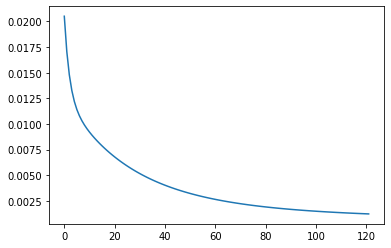

In [165]:

num_training = np.shape(x_train)[1]

# to make it easier to work with theta0
x_train_bias =  np.vstack((np.ones((1, num_training)), x_train))  # num_features x num_data
print(f'x_train_bias = {np.shape(x_train_bias)}')

num_features = np.shape(x_train_bias)[0]
init_theta = np.zeros((1, num_features))
learning_rate = 0.1
num_steps = 5000

final_theta, loss_history = gradient_descent(x_train_bias, y_train, init_theta, learning_rate, num_steps)
plt.figure(); plt.plot(loss_history)

As can be seen, our cost function is almost 0.

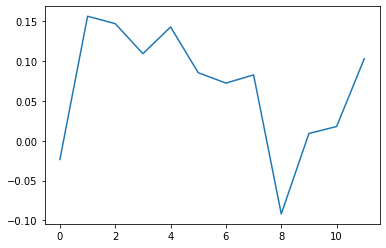

In [166]:
plt.figure(); plt.plot(final_theta.flatten())

In [167]:
print(np.shape(final_theta))
print(final_theta)
print(np.argmax(np.abs(final_theta)))
print(np.argmin(np.abs(final_theta)))

(1, 12)
[[-0.02339728  0.1564788   0.14715962  0.10946026  0.1430352   0.08551903
   0.07251175  0.0827729  -0.09184752  0.00923087  0.01794776  0.10317983]]
1
9


To see which feauture is more significant we have the plot above. It shows that our first and second features are more important. our 9th feautre is not that much important.

#We can go with just the two features that are more influential than other, but as long as other features have influenced our data, the error value will increase if we ignore other features.

In [168]:
num_test = np.shape(y_test)[1]
x_test_bias = np.vstack((np.ones((1, num_test)), x_test)) 
y_predict_test = np.matmul(final_theta, x_test_bias)

In [169]:
test_error = (y_predict_test - y_test)
print(np.sqrt(np.sum(np.square(test_error))) / 6)

0.041220504974468615


##The average least square errors is almost 4%.

the least effect: Construction type
The most effect: Local price and bathrooms